In [171]:
pip install ipympl

     -------------------------------------- 516.3/516.3 kB 8.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [175]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta as td
%matplotlib inline 
#inline
plt.ion



<function matplotlib.pyplot.ion()>

1. check best performing
2. take adj close of first trading day of subsequent month and corresponding date
3. add adj close to portfolio_value, ticker to portfolio and date to entry_dates
3. repeat for next month

In [140]:
Tickers = ["CSPX.AS", "SWRD.AS", "IMIE.PA", "CSX5.AS", "EMIM.AS", "VVSM.DE", "WTCH.AS"] #"VWCG.AS", "INRA.AS"
data_start = '2018-01-02'
start = '2020-01-02'
ClosingPrices = yf.download(Tickers, data_start)['Adj Close']
ClosingPrices

[*********************100%***********************]  7 of 7 completed


,CSPX.AS,CSX5.AS,EMIM.AS,IMIE.PA,SWRD.AS,VVSM.DE,WTCH.AS
Date,,,,,,,
2018-01-02,214.839005,105.654999,25.410000,111.139999,NaN,NaN,39.939999
2018-01-03,216.636993,106.250000,25.780001,112.209999,NaN,NaN,40.520000
2018-01-04,217.203003,108.059998,25.840000,112.639999,NaN,NaN,40.730000
2018-01-05,218.733994,109.260002,26.100000,113.440002,NaN,NaN,41.299999
2018-01-08,220.481003,109.489998,26.250000,114.230003,NaN,NaN,41.610001
...,...,...,...,...,...,...,...
2024-08-19,532.697021,179.860001,31.761000,210.447998,34.415001,38.450001,151.500000
2024-08-20,532.294006,179.160004,31.434000,209.550995,34.321999,38.700001,152.160004
2024-08-21,532.143005,180.259995,31.502001,209.931000,34.354000,38.759998,152.240005


In [141]:
#Get last trading days of each month
df_last_day_of_month = yf.download(Tickers[0], start)
last_trading_day_of_month = df_last_day_of_month.groupby(df_last_day_of_month.index.strftime('%Y-%m')).tail(1).index[0:-1]
print(last_trading_day_of_month)

[*********************100%***********************]  1 of 1 completed
DatetimeIndex(['2020-01-31', '2020-02-28', '2020-03-31', '2020-04-30',
               '2020-05-29', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-30', '2020-11-30', '2020-12-31',
               '2021-01-29', '2021-02-26', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-30', '2021-08-31',
               '2021-09-30', '2021-10-29', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-29',
               '2022-05-31', '2022-06-30', '2022-07-29', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-30',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-28',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-29', '2023-10-31', '2023-11-30', '2023-12-29',
               '2024-01-31', '2024-02-29', '2024-03-28', '2024-04-30',
        

In [142]:
start_date_index = ClosingPrices.index.searchsorted(start)
ClosingPrices_from_Start_Date = ClosingPrices.iloc[start_date_index:,]
ClosingPrices_from_Start_Date = ClosingPrices_from_Start_Date.dropna()
print(start_date_index, ClosingPrices_from_Start_Date.get('20210-01-01'))
display(ClosingPrices_from_Start_Date)
last_trading_day_of_month = ClosingPrices_from_Start_Date.groupby(ClosingPrices_from_Start_Date.index.strftime('%Y-%m')).tail(1).index[0:-1]
display(last_trading_day_of_month)


511 None


,CSPX.AS,CSX5.AS,EMIM.AS,IMIE.PA,SWRD.AS,VVSM.DE,WTCH.AS
Date,,,,,,,
2020-12-11,303.585999,115.279999,28.596001,139.279007,21.348000,16.430000,76.489998
2020-12-14,305.294006,115.820000,28.455999,139.746002,21.459000,16.719999,77.400002
2020-12-15,304.423004,116.379997,28.506001,139.815994,21.448000,16.875999,77.699997
2020-12-16,306.932007,117.099998,28.702999,140.897995,21.596001,16.878000,78.639999
2020-12-17,305.833008,117.699997,28.721001,140.770996,21.594999,16.848000,79.029999
...,...,...,...,...,...,...,...
2024-08-19,532.697021,179.860001,31.761000,210.447998,34.415001,38.450001,151.500000
2024-08-20,532.294006,179.160004,31.434000,209.550995,34.321999,38.700001,152.160004
2024-08-21,532.143005,180.259995,31.502001,209.931000,34.354000,38.759998,152.240005


DatetimeIndex(['2020-12-30', '2021-01-29', '2021-02-26', '2021-03-31',
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-30',
               '2021-08-31', '2021-09-30', '2021-10-29', '2021-11-30',
               '2021-12-30', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-29', '2022-05-31', '2022-06-30', '2022-07-29',
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-30', '2023-01-31', '2023-02-28', '2023-03-31',
               '2023-04-28', '2023-05-31', '2023-06-30', '2023-07-31',
               '2023-08-31', '2023-09-29', '2023-10-31', '2023-11-30',
               '2023-12-29', '2024-01-31', '2024-02-29', '2024-03-28',
               '2024-04-30', '2024-05-31', '2024-06-28', '2024-07-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [143]:
first_data_date = ClosingPrices_from_Start_Date.index[0]
print(first_data_date)
last_trading_day_of_month = last_trading_day_of_month[last_trading_day_of_month > first_data_date]
display(last_trading_day_of_month)

2020-12-11 00:00:00


DatetimeIndex(['2020-12-30', '2021-01-29', '2021-02-26', '2021-03-31',
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-30',
               '2021-08-31', '2021-09-30', '2021-10-29', '2021-11-30',
               '2021-12-30', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-29', '2022-05-31', '2022-06-30', '2022-07-29',
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-30', '2023-01-31', '2023-02-28', '2023-03-31',
               '2023-04-28', '2023-05-31', '2023-06-30', '2023-07-31',
               '2023-08-31', '2023-09-29', '2023-10-31', '2023-11-30',
               '2023-12-29', '2024-01-31', '2024-02-29', '2024-03-28',
               '2024-04-30', '2024-05-31', '2024-06-28', '2024-07-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [167]:
#We will invest 500 euros at the final trading day of each month over the entire period from start to today
trading_days = ClosingPrices_from_Start_Date.index
number_of_past_months = ClosingPrices_from_Start_Date.index.to_period('M').nunique()-1

invested_amount = [0]
days_of_entry = last_trading_day_of_month
print('Number of entry days: ', len(days_of_entry))

monthly_investment = 500

for i in range(1,len(trading_days)):
    if trading_days[i] in days_of_entry:
        #print(trading_days[i])
        invested_amount.append(invested_amount[i-1]+monthly_investment)
    else:
        invested_amount.append(invested_amount[i-1])

invested_amount_by_month = [0]

for i in range(1,number_of_past_months):
    invested_amount_by_month.append(invested_amount_by_month[i-1]+monthly_investment)


print(invested_amount)
print(invested_amount_by_month)
print(len(invested_amount), len(invested_amount_by_month))

plt.plot(trading_days, invested_amount)
#plt.plot(days_of_entry, invested_amount_by_month)
plt.xlabel("Time")
plt.ylabel('Total Invested Amount')
plt.show()


Number of entry days:  44
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 

In [113]:
#We now have, for every trading day the corresponding total invested amount
#At each of the entry days, we will add the best asset from the Tickers list that perform best in the previous month
#Let us get the best performer for each month
#Each one of the assets in monthly_best_performer is bought on the date from days_of_entry with the same index; This means, from that day on, we have an investment of 500eur that fluctuates according to the daily returns of that asset


def get_best_monthly_performer(monthly_returns, date, num_assets):
    # Select the best-performing assets based on past month returns
    best_assets = monthly_returns.loc[date].nlargest(num_assets).index
    return best_assets

monthly_returns = ClosingPrices_from_Start_Date.pct_change().resample('M').agg(lambda x : (x+1).prod()-1)

monthly_best_performer = []

for i in range(len(monthly_returns)-1):
    monthly_best_performer.append(monthly_returns.iloc[i].nlargest(1).index)

print(monthly_best_performer)
print(len(monthly_best_performer))

[Index(['WTCH.AS'], dtype='object'), Index(['VVSM.DE'], dtype='object'), Index(['CSX5.AS'], dtype='object'), Index(['CSX5.AS'], dtype='object'), Index(['WTCH.AS'], dtype='object'), Index(['CSX5.AS'], dtype='object'), Index(['WTCH.AS'], dtype='object'), Index(['WTCH.AS'], dtype='object'), Index(['WTCH.AS'], dtype='object'), Index(['EMIM.AS'], dtype='object'), Index(['WTCH.AS'], dtype='object'), Index(['VVSM.DE'], dtype='object'), Index(['CSX5.AS'], dtype='object'), Index(['EMIM.AS'], dtype='object'), Index(['VVSM.DE'], dtype='object'), Index(['CSPX.AS'], dtype='object'), Index(['EMIM.AS'], dtype='object'), Index(['CSX5.AS'], dtype='object'), Index(['EMIM.AS'], dtype='object'), Index(['VVSM.DE'], dtype='object'), Index(['EMIM.AS'], dtype='object'), Index(['CSPX.AS'], dtype='object'), Index(['CSX5.AS'], dtype='object'), Index(['CSX5.AS'], dtype='object'), Index(['CSX5.AS'], dtype='object'), Index(['VVSM.DE'], dtype='object'), Index(['VVSM.DE'], dtype='object'), Index(['VVSM.DE'], dtype='o

In [203]:
daily_returns = (ClosingPrices_from_Start_Date.pct_change()+1)[1:]
returns = ClosingPrices_from_Start_Date.pct_change()
daily_returns

,CSPX.AS,CSX5.AS,EMIM.AS,IMIE.PA,SWRD.AS,VVSM.DE,WTCH.AS
Date,,,,,,,
2020-12-14,1.005626,1.004684,0.995104,1.003353,1.005200,1.017651,1.011897
2020-12-15,0.997147,1.004835,1.001757,1.000501,0.999487,1.009330,1.003876
2020-12-16,1.008242,1.006187,1.006911,1.007739,1.006900,1.000119,1.012098
2020-12-17,0.996419,1.005124,1.000627,0.999099,0.999954,0.998222,1.004959
2020-12-18,0.997551,0.995752,1.001288,1.000206,0.997777,0.997863,0.999114
...,...,...,...,...,...,...,...
2024-08-19,1.000889,1.006604,1.005572,1.003706,1.002476,0.996243,1.000661
2024-08-20,0.999243,0.996108,0.989704,0.995738,0.997298,1.006502,1.004356
2024-08-21,0.999716,1.006140,1.002163,1.001813,1.000932,1.001550,1.000526


In [115]:
#Let's now calculate the portfolio value over time
#Suppose we buy the first monthly_best_performer on the first days_of_entry
#At the end of that day, our portfolio has a value of 500 (our initial investment)
#But the next day, our portfolio value will have changed by a factor:
print(daily_returns.get('2020-12-31'))


daily_returns.loc[pd.Timestamp(days_of_entry[0]), monthly_best_performer[0]][0]

None


0.9951408001586336

In [116]:
asset_paths = [np.zeros(len(trading_days)) for i in range(len(days_of_entry))]

print(len(asset_paths), len(asset_paths[0]))



44 945


In [117]:
for i in range(len(days_of_entry)):
    index = trading_days.tolist().index(days_of_entry[i])
    asset_paths[i][index] = 500
    for j in range(index+1, len(trading_days)):
        asset_paths[i][j] = asset_paths[i][j-1]*daily_returns.loc[trading_days[j], monthly_best_performer[i]]

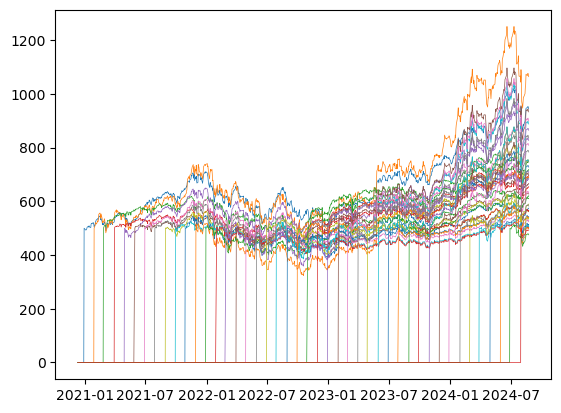

In [176]:
for i in range(len(asset_paths)):
    plt.plot(trading_days, asset_paths[i], linewidth = 0.5)

plt.show()

In [147]:
print(len(trading_days), asset_paths[0][:].size)
portfolio_value = []

for i in range(len(trading_days)):
    portfolio_value.append(np.sum([arr[i] for arr in asset_paths]))

print(portfolio_value)     

945 945
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 500.0, 492.86340709624415, 493.6145972368544, 494.6162477727699, 498.3723417598004, 503.5056813530516, 506.51058519947185, 504.0065066210094, 507.3870055377347, 508.95204867910786, 504.38210169131446, 502.81705854994124, 502.5040308171361, 515.5252012160797, 518.0292797945423, 517.0902443574531, 518.3423075273475, 521.2219811761152, 516.151208920364, 515.9634113852114, 1004.2569192549885, 1024.3287277996994, 1045.1439021507763, 1044.6729534343317, 1049.0003121223908, 1046.7241362714917, 1059.0013876955718, 1063.7111549305364, 1057.9488448939687, 1078.2997832619678, 1093.6998073056031, 1102.025571696178, 1098.5413500565687, 1076.3127848136583, 1068.4815906468207, 1088.9404405107264, 1059.524121940121, 1033.834174530172, 1043.3485519751866, 1036.45773893312, 1535.1393106700648, 1569.9644575611496, 1558.4987478462665, 1543.1582936940351, 1510.6986203505785, 1477.671338641659, 1522.9782768030427, 1534.2311229621241, 1543.75967

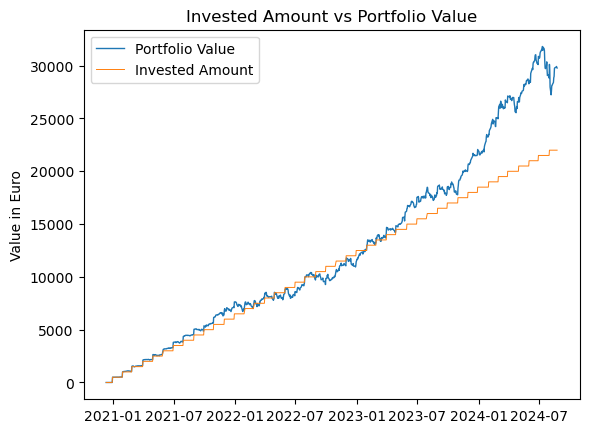

In [148]:
plt.plot(trading_days, portfolio_value, linewidth=1, label="Portfolio Value")
plt.plot(trading_days, invested_amount, linewidth=0.7, label="Invested Amount")
plt.title("Invested Amount vs Portfolio Value")
plt.legend()
plt.ylabel("Value in Euro")
plt.show()

Text(0, 0.5, 'Amount Gained in Euro')

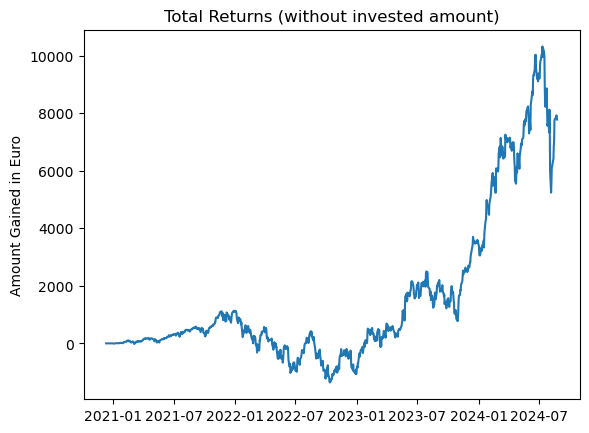

In [149]:
returns_without_invested_amount = [portfolio_value[i] - invested_amount[i] for i in range(len(portfolio_value))]
plt.plot(trading_days, returns_without_invested_amount)
plt.title("Total Returns (without invested amount)")
plt.ylabel("Amount Gained in Euro")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 40

C:\Users\dietd\AppData\Local\Temp\ipykernel_12008\3491663490.py:1: RuntimeWarning: invalid value encountered in double_scalars
  portfolio_percentage_return = [1-portfolio_value[i]/invested_amount[i] for i in range(len(portfolio_value))]


Text(0, 0.5, 'Percentage Returns')

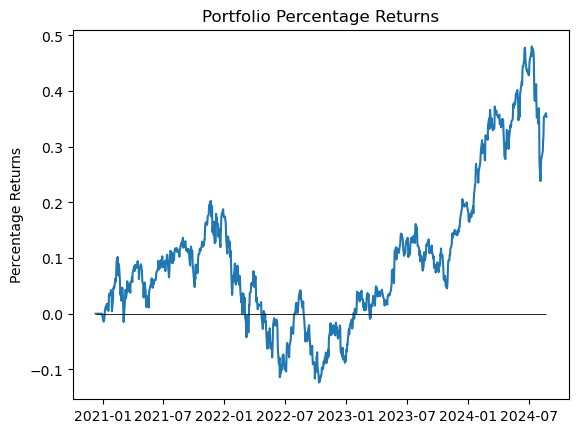

In [150]:
portfolio_percentage_return = [1-portfolio_value[i]/invested_amount[i] for i in range(len(portfolio_value))]

for i in range(len(portfolio_value)):
    if portfolio_value[i]==0 or invested_amount[i] == 0:
        cumulative_return = 0
    else:
        cumulative_return = returns_without_invested_amount[i]/invested_amount[i]
    portfolio_percentage_return[i] = cumulative_return


print(invested_amount)
print(portfolio_percentage_return)
plt.plot(trading_days, portfolio_percentage_return)
plt.title("Portfolio Percentage Returns")
plt.hlines(y=0, xmin = trading_days[0], xmax=trading_days[-1], color='black', linewidth=0.6)
plt.ylabel("Percentage Returns")

In [151]:
benchmark_paths = [[np.zeros(len(trading_days)) for i in range(len(days_of_entry))] for j in range(len(Tickers))]

for k, ticker in enumerate(Tickers):
    for i in range(len(days_of_entry)):
        index = trading_days.tolist().index(days_of_entry[i])
        benchmark_paths[k][i][index] = 500
        for j in range(index+1, len(trading_days)):
            benchmark_paths[k][i][j] = benchmark_paths[k][i][j-1]*daily_returns.loc[trading_days[j], ticker]

In [152]:
benchmark_investment_values = [[] for i in range(len(Tickers))]

for j in range(len(Tickers)):
    for i in range(len(trading_days)):
        benchmark_investment_values[j].append(np.sum([arr[i] for arr in benchmark_paths[j]]))

Portfolio Value:  29781.657643361617
Benchmark  CSPX.AS  Value:  28937.878864874954


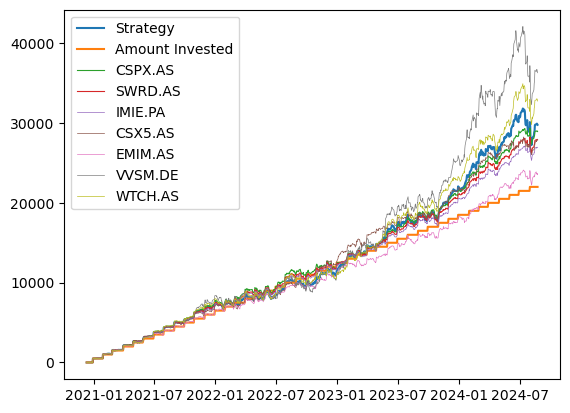

In [153]:
print("Portfolio Value: ",portfolio_value[-1])
print("Benchmark ", Tickers[0], " Value: ", benchmark_investment_values[0][-1])
plt.plot(trading_days, portfolio_value, label='Strategy')
plt.plot(trading_days, invested_amount, label='Amount Invested')
for i in range(len(Tickers)):
    if Tickers[i] in ["CSPX.AS", "SWRD.AS"]:
        linewidth = 0.8
        plt.plot(trading_days, benchmark_investment_values[i], label=Tickers[i], linewidth=linewidth)

    else:
        linewidth = 0.5
        plt.plot(trading_days, benchmark_investment_values[i], label=Tickers[i], linewidth=linewidth)

plt.legend()

Possible drawdown: An asset may perform very well for a short while and they keep being outperformed by the other assets. This causes a drawdown on the possible profit.
Can we use multiple lookbacks to improve the strategy?


In [177]:
def get_rolling_return(df, n):
    return df.rolling(n).apply(np.prod)

In [178]:
daily_returns_from_data_start = (ClosingPrices.pct_change()+1)[1:]

rolling_ret_252_days, rolling_ret_126_days, rolling_ret_63_days, rolling_ret_30_days = get_rolling_return(daily_returns_from_data_start, 252), get_rolling_return(daily_returns_from_data_start, 126), get_rolling_return(daily_returns_from_data_start, 63), get_rolling_return(daily_returns_from_data_start, 30)

In [179]:
def get_top_performer(date):
    first_check = rolling_ret_252_days.loc[date].nlargest(4).index
    second_check = rolling_ret_126_days.loc[date, first_check].nlargest(3).index
    third_check = rolling_ret_63_days.loc[date, second_check].nlargest(2).index
    last_check = rolling_ret_30_days.loc[date, third_check].nlargest(1).index

    return last_check

['WTCH.AS', 'CSPX.AS', 'IMIE.PA', 'SWRD.AS', 'VVSM.DE', 'CSX5.AS', 'EMIM.AS'] 7


([<matplotlib.patches.Wedge at 0x1f1ed81bdc0>,
 [Text(0.8313245164615624, 0.7203468250294088, 'WTCH.AS'),
  Text(-0.527173922370469, 0.9654468683322428, 'CSPX.AS'),
  Text(-1.0306447114053963, 0.38441056027649334, 'IMIE.PA'),
  Text(-1.0971973295778874, 0.0784730524903472, 'SWRD.AS'),
  Text(-0.7203467471951875, -0.8313245839052956, 'VVSM.DE'),
  Text(0.6592055118621629, -0.8805953061029477, 'CSX5.AS'),
  Text(1.0888036000597223, -0.1565462247931533, 'EMIM.AS')])

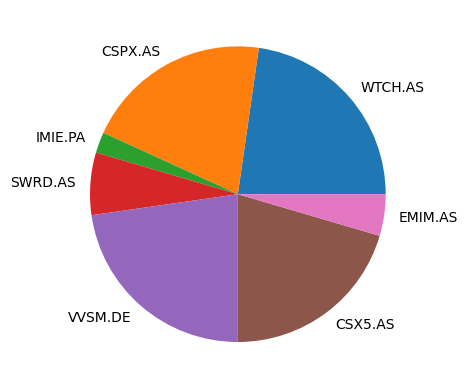

In [180]:
top_performers = [get_top_performer(date)[0] for date in days_of_entry]

individual_assets = list(set(top_performers))

number_of_each_asset_in_top_performers = [top_performers.count(asset) for asset in individual_assets]

print(individual_assets, len(number_of_each_asset_in_top_performers))

asset_proportions = [n/len(individual_assets) for n in number_of_each_asset_in_top_performers]

plt.pie(asset_proportions, labels=individual_assets)

In [181]:
asset_paths2 = [np.zeros(len(trading_days)) for i in range(len(days_of_entry))]

for i in range(len(days_of_entry)):
    index = trading_days.tolist().index(days_of_entry[i])
    asset_paths2[i][index] = 500
    for j in range(index+1, len(trading_days)):
        asset_paths2[i][j] = asset_paths2[i][j-1]*daily_returns.loc[trading_days[j], top_performers[i]]


In [182]:
print(len(trading_days), asset_paths2[0][:].size)
portfolio_value2 = []

for i in range(len(trading_days)):
    portfolio_value2.append(np.sum([arr[i] for arr in asset_paths2]))

945 945


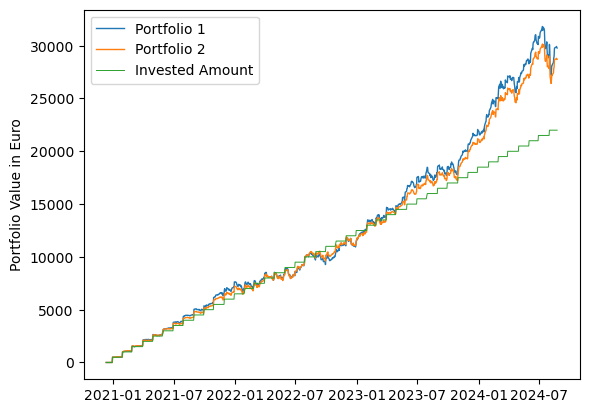

In [183]:
plt.plot(trading_days, portfolio_value, label="Portfolio 1", linewidth=1)
plt.plot(trading_days, portfolio_value2, label="Portfolio 2", linewidth=1)
plt.plot(trading_days, invested_amount, linewidth = 0.7, label = "Invested Amount")
plt.ylabel("Portfolio Value in Euro")
plt.legend()

In [184]:
print(portfolio_value[-1], portfolio_value2[-1])
print("Strategy with multiple lookbacks performed ", (portfolio_value2[-1]/portfolio_value[-1]-1)*100, "percent better" )

29781.657643361617 28705.040395056367
Strategy with multiple lookbacks performed  -3.6150346673037848 percent better


Single Momentum Strategy Portfolio Value:  29781.657643361617
Multiple Momentum Strategy Portfolio Value:  28705.040395056367


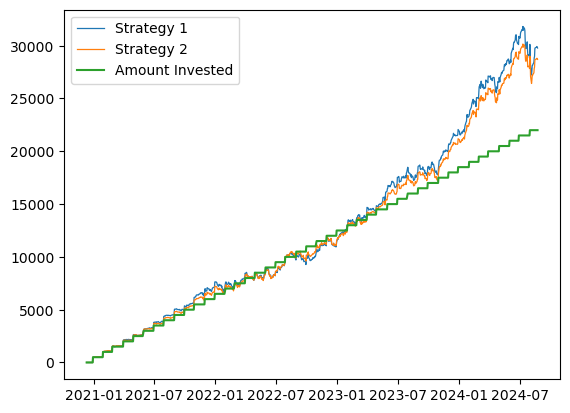

In [185]:
print("Single Momentum Strategy Portfolio Value: ", portfolio_value[-1])
print("Multiple Momentum Strategy Portfolio Value: ", portfolio_value2[-1])
plt.plot(trading_days, portfolio_value, label='Strategy 1', linewidth = 0.9)
plt.plot(trading_days, portfolio_value2, label='Strategy 2', linewidth = 0.9)
plt.plot(trading_days, invested_amount, label='Amount Invested')
for i in range(len(Tickers)):
    if Tickers[i] in ["^GSPC", "VWRL.AS"]:
        linewidth = 0.8
        plt.plot(trading_days, benchmark_investment_values[i], label=Tickers[i], linewidth=linewidth)

    else:
        linewidth = 0.5
    #plt.plot(trading_days, benchmark_investment_values[i], label=Tickers[i], linewidth=linewidth)

plt.legend()

In [186]:
returns_without_invested_amount2 = [portfolio_value2[i]- invested_amount[i] for i in range(len(portfolio_value2))]
portfolio_percentage_return2 = np.zeros(len(portfolio_value2))
for i in range(len(portfolio_value2)):
    if portfolio_value2[i]==0 or invested_amount[i]==0:
        portfolio_percentage_return2[i] = 0
    else:
        portfolio_percentage_return2[i] = returns_without_invested_amount2[i] / invested_amount[i]

29781.657643361617

28705.040395056367

22000

Percentage Return Since Start of Portfolio 2:  30.477456341165304


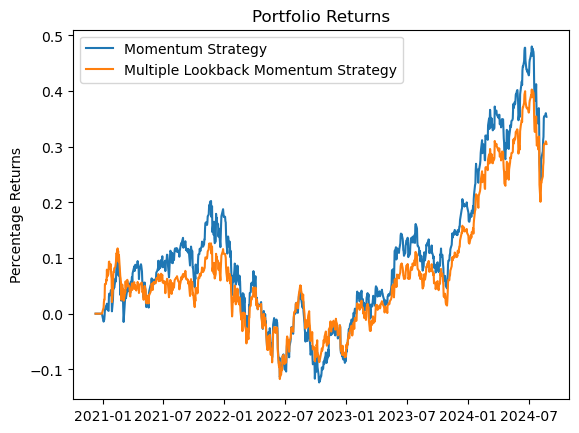

In [187]:
plt.plot(trading_days, portfolio_percentage_return, label="Momentum Strategy")
plt.plot(trading_days, portfolio_percentage_return2, label="Multiple Lookback Momentum Strategy")
plt.legend()
plt.ylabel("Percentage Returns")
plt.title("Portfolio Returns")
display(portfolio_value[-1], portfolio_value2[-1])
display(invested_amount[-1])
print("Percentage Return Since Start of Portfolio 2: ", portfolio_percentage_return2[-1]*100)

In [204]:
display(ClosingPrices_from_Start_Date, returns)

,CSPX.AS,CSX5.AS,EMIM.AS,IMIE.PA,SWRD.AS,VVSM.DE,WTCH.AS
Date,,,,,,,
2020-12-11,303.585999,115.279999,28.596001,139.279007,21.348000,16.430000,76.489998
2020-12-14,305.294006,115.820000,28.455999,139.746002,21.459000,16.719999,77.400002
2020-12-15,304.423004,116.379997,28.506001,139.815994,21.448000,16.875999,77.699997
2020-12-16,306.932007,117.099998,28.702999,140.897995,21.596001,16.878000,78.639999
2020-12-17,305.833008,117.699997,28.721001,140.770996,21.594999,16.848000,79.029999
...,...,...,...,...,...,...,...
2024-08-19,532.697021,179.860001,31.761000,210.447998,34.415001,38.450001,151.500000
2024-08-20,532.294006,179.160004,31.434000,209.550995,34.321999,38.700001,152.160004
2024-08-21,532.143005,180.259995,31.502001,209.931000,34.354000,38.759998,152.240005


,CSPX.AS,CSX5.AS,EMIM.AS,IMIE.PA,SWRD.AS,VVSM.DE,WTCH.AS
Date,,,,,,,
2020-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-14,0.005626,0.004684,-0.004896,0.003353,0.005200,0.017651,0.011897
2020-12-15,-0.002853,0.004835,0.001757,0.000501,-0.000513,0.009330,0.003876
2020-12-16,0.008242,0.006187,0.006911,0.007739,0.006900,0.000119,0.012098
2020-12-17,-0.003581,0.005124,0.000627,-0.000901,-0.000046,-0.001778,0.004959
...,...,...,...,...,...,...,...
2024-08-19,0.000889,0.006604,0.005572,0.003706,0.002476,-0.003757,0.000661
2024-08-20,-0.000757,-0.003892,-0.010296,-0.004262,-0.002702,0.006502,0.004356
2024-08-21,-0.000284,0.006140,0.002163,0.001813,0.000932,0.001550,0.000526


In [205]:
training_period = 30
in_sample = daily_returns.iloc[:(returns.shape[0] - training_period), :].copy()
covariance_matrix = in_sample.cov()

In [206]:
D, S = np.linalg.eigh(covariance_matrix)

eigenportfolio_1 = S[:, -1] / np.sum(S[:,-1])
eigenportfolio_2 = S[:, -2] / np.sum(S[:,-2])

eigenportfolio1 = pd.DataFrame(data = eigenportfolio_1, columns=["Investment Weight"], index=Tickers)
eigenportfolio2 = pd.DataFrame(data = eigenportfolio_2, columns=["Investment Weight"], index=Tickers)

display(eigenportfolio1)

,Investment Weight
CSPX.AS,0.120893
SWRD.AS,0.125618
IMIE.PA,0.098929
CSX5.AS,0.110751
EMIM.AS,0.115076
VVSM.DE,0.246830
WTCH.AS,0.181902


Text(0.5, 1.0, 'S&P500')

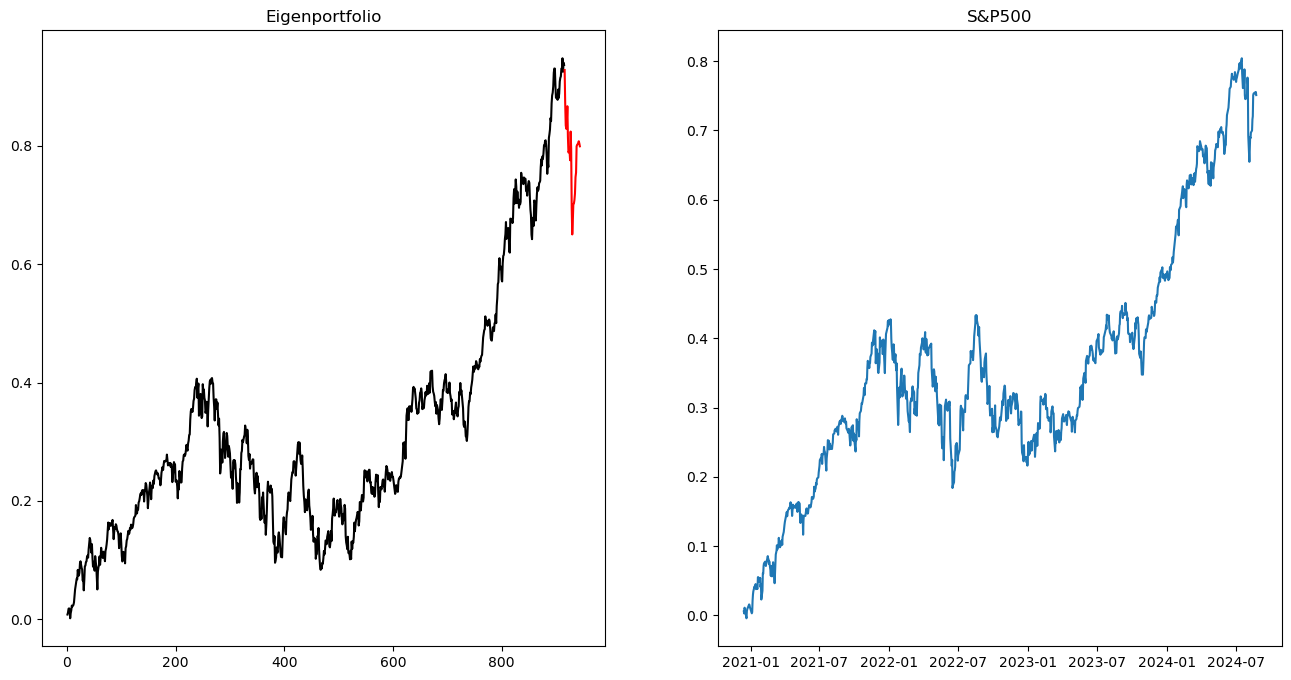

In [212]:
def get_cumulative_returns_over_time(sample, weights):
        return (((1+sample).cumprod(axis=0))-1).dot(weights)
    
in_sample_ind = np.arange(0, (returns.shape[0]-training_period+1))
out_sample_ind = np.arange((returns.shape[0]-training_period+1), returns.shape[0])
    
cumulative_returns = get_cumulative_returns_over_time(returns, eigenportfolio1).values
        
f = plt.figure(figsize=(16,8))
    
ax = plt.subplot(121)
ax.plot(cumulative_returns[in_sample_ind], 'black')
ax.plot(out_sample_ind,cumulative_returns[out_sample_ind], 'r')
plt.title("Eigenportfolio")

ax = plt.subplot(122)
plt.plot((((1+returns.loc[:,'CSPX.AS']).cumprod(axis=0))-1))
plt.title("S&P500")